

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [10]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = yesterday
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-14'] ['2016-12-13'] ['2016-12-08']
['2016-12-14']
'2016-12-14'


### get url

In [11]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-14'


In [12]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [13]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [15]:
df = pd.read_csv(url)

In [16]:
df.shape

(192, 16)

#### wow, 5 days > 1000 reports

In [17]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6629795,12/14/2016 07:30:55 PM,NaN,12/14/2016 07:30:55 PM,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of CASTENADA AVE and PACHECO ST,7,Forest Hill,"(37.7477766021803, -122.462333070821)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58520e653da19793c74d2a43/photo_20161214_193036.jpg
1,6629742,12/14/2016 06:58:20 PM,NaN,12/14/2016 07:25:30 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sidewalk_structure - Not_Offensive,"350 LAGUNA HONDA BLVD, SAN FRANCISCO, CA, 94116",7,Forest Hill,"(37.748394352352, -122.459314049911)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585206bf3da19793c74d29c4/report.jpg
2,6629735,12/14/2016 06:53:57 PM,NaN,12/14/2016 06:53:57 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_residential - Not_Offensive,"1979 15TH ST, SAN FRANCISCO, CA, 94114",8,Mission Dolores,"(37.766047399763, -122.428363221761)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585205b93da19793c74d299e/report.jpg


In [18]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [19]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6629795,2016-12-14 19:30:55,NaT,2016-12-14 19:30:55,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of CASTENADA AVE and PACHECO ST,7,Forest Hill,"(37.7477766021803, -122.462333070821)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58520e653da19793c74d2a43/photo_20161214_193036.jpg
1,6629742,2016-12-14 18:58:20,NaT,2016-12-14 19:25:30,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sidewalk_structure - Not_Offensive,"350 LAGUNA HONDA BLVD, SAN FRANCISCO, CA, 94116",7,Forest Hill,"(37.748394352352, -122.459314049911)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585206bf3da19793c74d29c4/report.jpg
2,6629735,2016-12-14 18:53:57,NaT,2016-12-14 18:53:57,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_residential - Not_Offensive,"1979 15TH ST, SAN FRANCISCO, CA, 94114",8,Mission Dolores,"(37.766047399763, -122.428363221761)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585205b93da19793c74d299e/report.jpg


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=14.0, right=14.0
  'left=%s, right=%s') % (left, right))


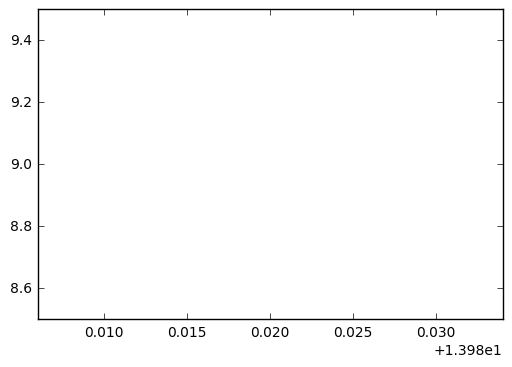

In [20]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=14.0, right=14.0
  'left=%s, right=%s') % (left, right))


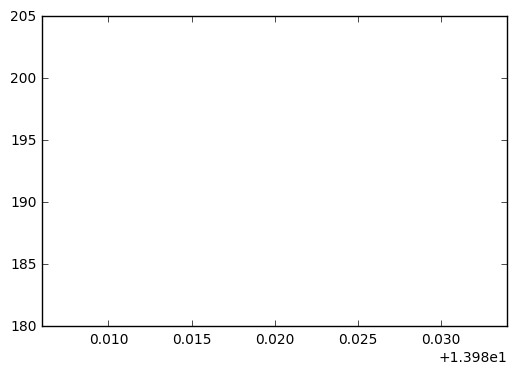

In [21]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


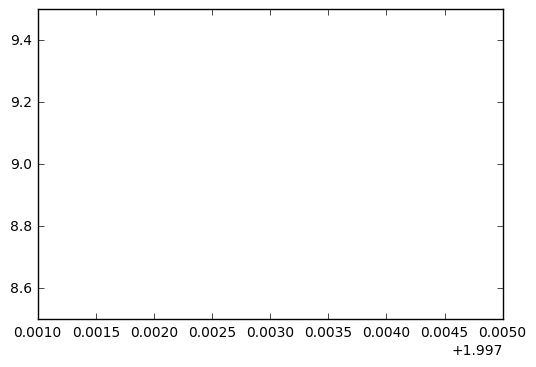

In [22]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [23]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [24]:

df['Request Details'].value_counts()


Other_enter_additional_details_below - Offensive    28
Pole - Not_Offensive                                22
Building_commercial - Not_Offensive                 15
Mail_box - Not_Offensive                            13
Signal_box - Not_Offensive                          11
Building_commercial - Offensive                     10
Transit_Shelter_Platform - Not_Offensive             9
Building_residential - Offensive                     9
Signal_box - Offensive                               8
Sidewalk_in_front_of_property - Offensive            8
Building_other - Offensive                           8
Mail_box - Offensive                                 7
Pole - Offensive                                     7
Transit_Shelter_Platform - Offensive                 4
Building_residential - Not_Offensive                 4
Fire_Police_Callbox - Not_Offensive                  3
Building_other - Not_Offensive                       3
Sidewalk_structure - Not_Offensive                   3
Parking_me

In [25]:
df['Supervisor District'].value_counts().sort_index()



1      1
2      4
3     23
4      1
5     59
6     16
7      3
8     15
9     57
10    10
11     3
Name: Supervisor District, dtype: int64

In [26]:
df.Neighborhood.value_counts()

Mission                    48
Haight Ashbury             39
Chinatown                  11
Mission Dolores             9
Bayview                     8
Bernal Heights              8
Civic Center                8
North Beach                 5
Panhandle                   4
South of Market             4
Lower Haight                4
Buena Vista                 4
Cole Valley                 4
Pacific Heights             3
Tenderloin                  3
Nob Hill                    3
Downtown / Union Square     2
Castro                      2
Duboce Triangle             2
Lower Nob Hill              2
Forest Hill                 2
Central Waterfront          1
Cathedral Hill              1
Polk Gulch                  1
Cayuga                      1
Ingleside Terraces          1
Outer Mission               1
Inner Richmond              1
West Portal                 1
Portola                     1
Telegraph Hill              1
Corona Heights              1
Hayes Valley                1
Outer Suns

In [27]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
11,6629497,2016-12-14 17:03:42,NaT,2016-12-14 17:03:42,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of 15TH ST and JULIAN AVE,9,Mission,"(37.7665993360598, -122.421056485527)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851ebe13da19793c74d2713/photo_20161214_170301.jpg
14,6629467,2016-12-14 16:54:11,NaT,2016-12-14 16:54:11,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_residential - Offensive,"2808 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752208037868, -122.414251606301)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851e9a83da19793c74d26b2/report.jpg
39,6628955,2016-12-14 14:58:20,NaT,2016-12-14 15:25:21,Open,open,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_residential - Offensive,"455 VALENCIA ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765649569603, -122.421775364545)",Open311,NaN
48,6628821,2016-12-14 14:33:12,NaT,2016-12-14 14:54:58,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"2578 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.756031298586, -122.414558315234)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851c89d3da19793c74d2127/report.jpg
57,6628703,2016-12-14 14:10:30,NaT,2016-12-14 14:32:07,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"3079 16TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.764897391545, -122.421305283868)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851c3453da19793c74d2015/photo_20161214_140943.jpg
72,6628594,2016-12-14 13:50:59,NaT,2016-12-14 15:28:54,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"3092 24TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.75262453789, -122.413936578825)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851beb23da19793c74d1ed1/report.jpg
73,6628591,2016-12-14 13:50:25,NaT,2016-12-14 14:19:16,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"2790 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752622160959, -122.414364125303)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851be963da19793c74d1ec5/report.jpg
75,6628584,2016-12-14 13:49:37,NaT,2016-12-14 14:19:12,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"3078 24TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752656984301, -122.41361437539)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851be653da19793c74d1ea5/report.jpg
76,6628577,2016-12-14 13:48:35,NaT,2016-12-14 13:48:35,Open,accepted,DPT Meter_Bike Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Parking_meter - Not_Offensive,Intersection of 24TH ST and LILAC ST,9,Mission,"(37.7522712511524, -122.417876793921)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851be253da19793c74d1e9b/report.jpg
79,6628563,2016-12-14 13:45:52,NaT,2016-12-14 14:03:24,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_residential - Offensive,"3040 24TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752691945392, -122.412824751929)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5851bd803da19793c74d1e59/report.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [28]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [29]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


0     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851efd33da19793c74d27cd/photo_20161214_171938.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851eb913da19793c74d26f0/photo_20161214_170117.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851e21f3da19793c74d25db/photo_20161214_162257.jpg
3     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851dc2e3da19793c74d2506/photo_20161214_155729.jpg
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851dba33da19793c74d24ec/photo_20161214_155324.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851da313da19793c74d2483/photo_20161214_154731.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851d9b43da19793c74d246d/photo_20161214_154704.jpg
7                                                                                                                 NaN
8                    http://mobile311.sfgov.org/media/sa

In [30]:
print(peskin[:])

0     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851efd33da19793c74d27cd/photo_20161214_171938.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851eb913da19793c74d26f0/photo_20161214_170117.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851e21f3da19793c74d25db/photo_20161214_162257.jpg
3     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851dc2e3da19793c74d2506/photo_20161214_155729.jpg
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851dba33da19793c74d24ec/photo_20161214_155324.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851da313da19793c74d2483/photo_20161214_154731.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/5851d9b43da19793c74d246d/photo_20161214_154704.jpg
7                                                                                                                 NaN
8                    http://mobile311.sfgov.org/media/sa

# The whole City

In [31]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0      http://mobile311.sfgov.org/media/san_francisco/report/photos/58520e653da19793c74d2a43/photo_20161214_193036.jpg
1                     http://mobile311.sfgov.org/media/san_francisco/report/photos/585206bf3da19793c74d29c4/report.jpg
2                     http://mobile311.sfgov.org/media/san_francisco/report/photos/585205b93da19793c74d299e/report.jpg
3                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852058b3da19793c74d2992/report.jpg
4      http://mobile311.sfgov.org/media/san_francisco/report/photos/5851f01d3da19793c74d27e7/photo_20161214_172123.jpg
5      http://mobile311.sfgov.org/media/san_francisco/report/photos/5851efd33da19793c74d27cd/photo_20161214_171938.jpg
6      http://mobile311.sfgov.org/media/san_francisco/report/photos/5851eea23da19793c74d27ad/photo_20161214_171516.jpg
7      http://mobile311.sfgov.org/media/san_francisco/report/photos/5851ede73da19793c74d2779/photo_20161214_171207.jpg
8                     http://mobile311.sfgov.org

In [32]:
len(images)

172

In [33]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/58520e653da19793c74d2a43/photo_20161214_193036.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5851d7c53da19793c74d2415/report.jpg


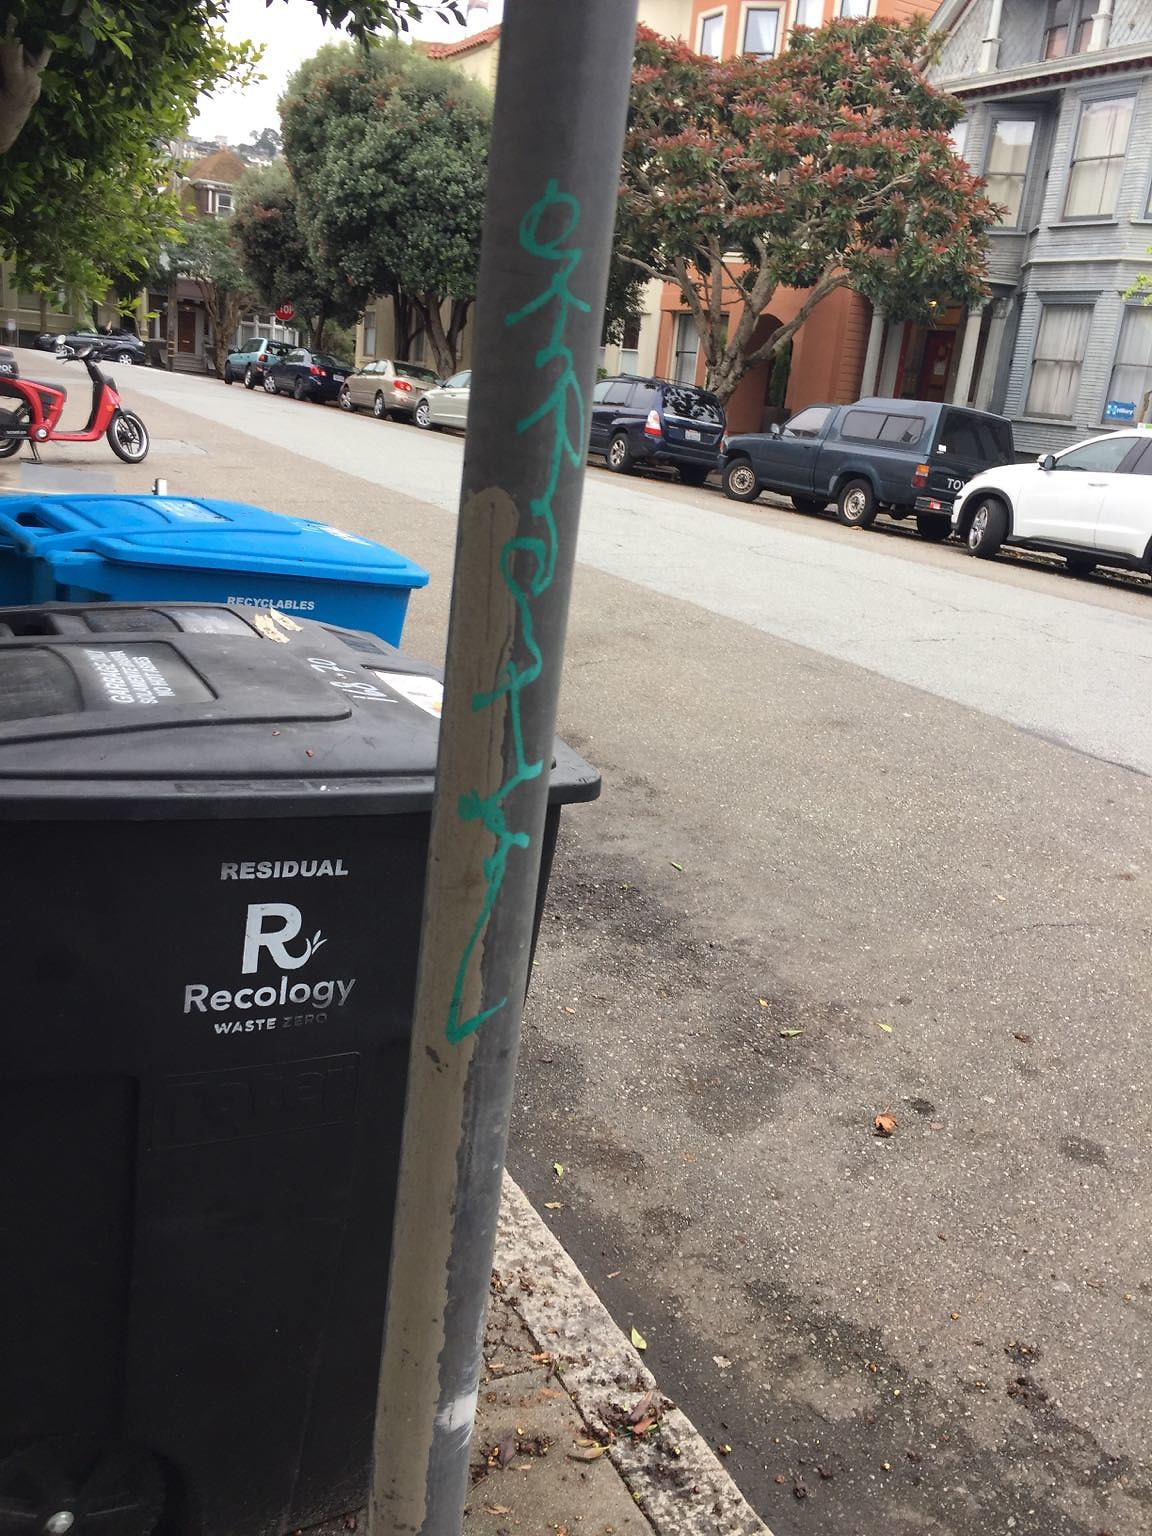

In [34]:
print(images[20])
Image(images[20])


In [35]:
!pwd

/home/gdillon/SF311analysis/JupyterPractice/graffiti_SF311


In [37]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [53]:
!yes| bash vidCreate.sh

idn_encode failed (3): 'Non-digit/letter/hyphen in input'
--2016-12-13 14:23:50--  http://%22%22/
Resolving "" ("")... failed: Name or service not known.
wget: unable to resolve host address '""'
--2016-12-13 14:23:50--  http://%22%22/
Resolving "" ("")... failed: Name or service not known.
wget: unable to resolve host address '""'
--2016-12-13 14:23:50--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584f51eb3da19793c74ccea5/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239172 (234K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 233.57K  1007KB/s    in 0.2s    

2016-12-13 14:23:50 (1007 KB/s) - 'report.jpg' saved [239172/239172]

--2016-12-13 14:23:50--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3f7e3da19793c74ccc13/photo_20161212_1

In [28]:
'''
Had problems with this code, running standalone

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..
'''

'\nHad problems with this code, running standalone\n\n%cd assets/\n!wget -i ../imagelist.txt\n\n!sleep 30\n#%ls | gawk \'BEGIN{ a=1 }{ printf "mv "%s" %04d.jpg\n", $0, a++ }\' | bash\n#!sleep 10\n#!convert -delay 50 *.jpg out.mp4\n%cd ..\n'

In [29]:
#!convert -delay 50 *.jpg out.mp4


In [54]:
!ls -la


total 15904
drwxrwxr-x 5 gdillon gdillon     4096 Dec 13 14:24 .
drwxrwxr-x 8 gdillon gdillon     4096 Dec 13 10:41 ..
drwxrwxr-x 2 gdillon gdillon     4096 Dec 12 20:08 .ipynb_checkpoints
-rw-rw-r-- 1 gdillon gdillon    19266 Dec 12 21:21 ImportTablefromWikipedia.ipynb
-rw-rw-r-- 1 gdillon gdillon    98418 Dec 12 19:54 SF311 Annual .ipynb
-rw-rw-r-- 1 gdillon gdillon   276804 Dec 13 13:48 San+Fran +Graffiti pull one day.ipynb
-rw-rw-r-- 1 gdillon gdillon   562269 Dec  9 10:22 San+Francisco+Graffiti with Video.ipynb
drwxrwxr-x 2 gdillon gdillon    36864 Dec 10 22:21 assets
-rw-rw-r-- 1 gdillon gdillon     3712 Dec 13 14:23 imagelist.txt
drwxrwxr-x 2 gdillon gdillon    12288 Dec 13 14:23 input
-rw-rw-r-- 1 gdillon gdillon      168 Dec  9 16:49 pipevid.sh
-rw-rw-r-- 1 gdillon gdillon   430884 Dec 13 14:24 sfOneDay.ipynb
-rw-rw-r-- 1 gdillon gdillon      223 Dec 11 00:00 vidCreate.sh
-rw-rw-r-- 1 gdillon gdillon 14110852 Dec 13 14:23 video.gif
-rw-rw-r-- 1 gdillon gdillon   693865 Dec 10 

In [31]:
Image('report2.jpg')